In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap


In [ ]:
# Load the iris dataset
iris = datasets.load_iris()

# Convert to a pandas DataFrame
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target

# Display the head of the dataset
print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


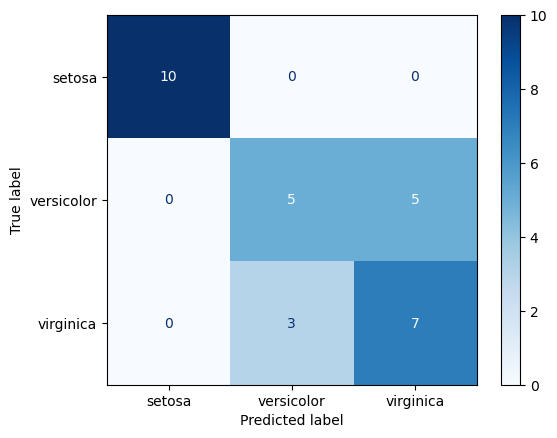

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.62      0.50      0.56        10
   virginica       0.58      0.70      0.64        10

    accuracy                           0.73        30
   macro avg       0.74      0.73      0.73        30
weighted avg       0.74      0.73      0.73        30



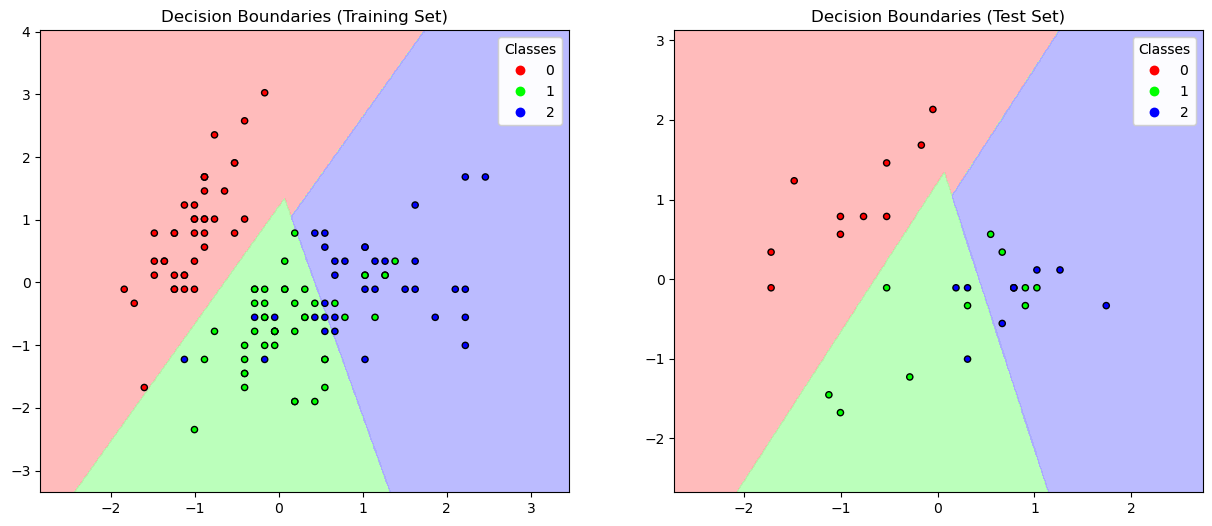

In [1]:
# Select two features for visualization purposes
X = data[['sepal length (cm)', 'sepal width (cm)']].values
y = data['species'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SVM model with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.show()

# Print a classification report
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, ax, title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ['#FF0000', '#00FF00', '#0000FF']
    
    # Create a mesh to plot the decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    
    # Plot training points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold), edgecolor='k', s=20)
    
    # Create legend
    legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    ax.add_artist(legend1)
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)

# Plot the decision boundaries for the training set
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
plot_decision_boundaries(X_train, y_train, svm_model, ax[0], 'Decision Boundaries (Training Set)')

# Plot the decision boundaries for the test set
plot_decision_boundaries(X_test, y_test, svm_model, ax[1], 'Decision Boundaries (Test Set)')

plt.show()
